In [2]:
import pandas as pd 

In [39]:
data = pd.read_excel("Procurement Dataset.xlsx")
data.head()

,PO_Id,Approving_officer,Requesting_officer,Supplier_Name,Product_Category,Sub_Category,Quantity,Procurement_Process,Tender_Invitation,Deadline_for_Submissions,No_of_bids_Received,Unit_Price,Buying_Price,Purchase_Date,Total_Buying_Price,Fraud
0,1001,Rowney Cortin,Bunny Spraggs,Rosenbaum Group,Beverages,Juice,61,Non-Competitive Bid,2015-01-01,2015-01-01,0,108,99,2015-01-02,6039,0
1,1002,Karol Ferre,Lorrayne O' Lone,"Botsford, Rolfson and Pouros",Seafood,Crab,42,Non-Competitive Bid,2015-01-01,2015-01-01,0,103,94,2015-01-02,3948,0
2,1003,Adelbert Heindrich,Nicolette Convery,Ferry-Dibbert,Dairy,Yogurt,75,Competitive Bid,2015-01-02,2015-01-09,6,133,124,2015-01-09,9300,0
3,1004,Wilone Kaufman,Reuben Chiommienti,Gusikowski Group,Cleaning_products,Sponges / Scrubbers,56,Competitive Bid,2015-01-02,2015-01-05,6,40,31,2015-01-06,1736,0
4,1005,Jasper Raccio,Ely Gwinnel,Hartmann Inc,Canned_foods,Broth,78,Non-Competitive Bid,2015-01-03,2015-01-03,0,83,81,2015-01-05,6318,1


In [30]:
data.describe()

,PO_Id,Quantity,No_of_bids_Received,Unit_Price,Buying_Price,Total_Buying_Price,Fraud
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,3000.500000,59.746250,3.937000,114.370750,108.327500,6471.795250,0.192250
std,1154.844867,11.661598,3.126816,48.646983,48.957997,3248.951932,0.394118
min,1001.000000,40.000000,0.000000,30.000000,21.000000,924.000000,0.000000
25%,2000.750000,50.000000,1.000000,71.000000,66.000000,3795.750000,0.000000
50%,3000.500000,60.000000,4.000000,115.000000,108.000000,6120.000000,0.000000
75%,4000.250000,70.000000,7.000000,157.000000,150.250000,8789.500000,0.000000
max,5000.000000,80.000000,9.000000,199.000000,209.000000,16274.000000,1.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   PO_Id                     4000 non-null   int64         
 1   Approving_officer         3736 non-null   object        
 2   Requesting_officer        3514 non-null   object        
 3   Supplier_Name             4000 non-null   object        
 4   Product_Category          4000 non-null   object        
 5   Sub_Category              4000 non-null   object        
 6   Quantity                  4000 non-null   int64         
 7   Procurement_Process       4000 non-null   object        
 8   Tender_Invitation         4000 non-null   datetime64[ns]
 9   Deadline_for_Submissions  4000 non-null   datetime64[ns]
 10  No_of_bids_Received       4000 non-null   int64         
 11  Unit_Price                4000 non-null   int64         
 12  Buying_Price        

### Dealing with missing values

In [ ]:
data.Approving_officer.isna().sum()
data.Requesting_officer.isna().sum()
data.Supplier_Name.isna().sum()
data.Product_Category.isna().sum()
data.Sub_Category.isna().sum()

0

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["Approving_officer"] = pd.DataFrame(mode_imputer.fit_transform(data[["Approving_officer"]]))
data["Requesting_officer"] = pd.DataFrame(mode_imputer.fit_transform(data[["Requesting_officer"]]))

### Label Encoding

In [5]:
data.replace({'Procurement_Process': {'Non-Competitive Bid': 1, 'Competitive Bid': 0} },inplace=True)

Approving officer names label encoding

In [6]:
list3 = data.Approving_officer.unique()

In [ ]:
dicts = {}
for i in range(len(list3)):
        j = list3[i]
        dicts[j] = i
print(dicts)


{'Rowney Cortin': 0, 'Karol Ferre': 1, 'Adelbert Heindrich': 2, 'Wilone Kaufman': 3, 'Jasper Raccio': 4, 'Krista Helin': 5, 'Leoline Emlin': 6, "Laure O'Sharry": 7, 'Parry Shiel': 8, 'Rafael Penchen': 9, 'Jolene Hamby': 10, 'Eleanora Pattlel': 11, 'Morry MacGibbon': 12, 'Sauveur Da Costa': 13, "Donni O'Shiel": 14, 'Matthiew Tolley': 15, 'Genny Doherty': 16, 'Amos Brusby': 17, 'Shanda Chaston': 18, 'Clarita Alldred': 19, 'Malissa Wenderoth': 20, 'Shandra McChruiter': 21, 'Brigit Pickle': 22, 'Jemima Girdler': 23, 'Sophronia Gennrich': 24, 'Tabbi Rounsefull': 25, 'Misha Brendel': 26, 'Doralyn Jimeno': 27, 'Lucian Tettley': 28, 'Analise Gamon': 29, 'Pandora Couper': 30, 'Pavlov McNirlan': 31, 'Shaine Bate': 32, 'Parry Puig': 33, 'Chadwick Demelt': 34, 'Thatch Basterfield': 35, 'Tonnie Kesteven': 36, 'Mattie Speeding': 37, 'Bowie Magenny': 38, 'Lyn Arenson': 39, 'Kerry Plet': 40, 'Ethelyn Charrington': 41, 'Lenora Titmuss': 42, 'Etan Messent': 43, 'Stormie Deery': 44}


In [7]:
data.replace({'Approving_officer':{'Rowney Cortin': 0, 'Karol Ferre': 1, 'Adelbert Heindrich': 2, 'Wilone Kaufman': 3, 'Jasper Raccio': 4, 'Krista Helin': 5, 'Leoline Emlin': 6, "Laure O'Sharry": 7, 'Parry Shiel': 8, 'Rafael Penchen': 9, 'Jolene Hamby': 10, 'Eleanora Pattlel': 11, 'Morry MacGibbon': 12, 'Sauveur Da Costa': 13, "Donni O'Shiel": 14, 'Matthiew Tolley': 15, 'Genny Doherty': 16, 'Amos Brusby': 17, 'Shanda Chaston': 18, 'Clarita Alldred': 19, 'Malissa Wenderoth': 20, 'Shandra McChruiter': 21, 'Brigit Pickle': 22, 'Jemima Girdler': 23, 'Sophronia Gennrich': 24, 'Tabbi Rounsefull': 25, 'Misha Brendel': 26, 'Doralyn Jimeno': 27, 'Lucian Tettley': 28, 'Analise Gamon': 29, 'Pandora Couper': 30, 'Pavlov McNirlan': 31, 'Shaine Bate': 32, 'Parry Puig': 33, 'Chadwick Demelt': 34, 'Thatch Basterfield': 35, 'Tonnie Kesteven': 36, 'Mattie Speeding': 37, 'Bowie Magenny': 38, 'Lyn Arenson': 39, 'Kerry Plet': 40, 'Ethelyn Charrington': 41, 'Lenora Titmuss': 42, 'Etan Messent': 43, 'Stormie Deery': 44}},inplace=True)

Requesting officer names label encoding

In [76]:
list3 = data.Requesting_officer.unique()

In [ ]:
dicts = {}
for i in range(len(list3)):
        j = list3[i]
        dicts[j] = i


In [8]:
data.replace({'Requesting_officer': {'Bunny Spraggs': 0, "Lorrayne O' Lone": 1, 'Nicolette Convery': 2, 'Reuben Chiommienti': 3, 'Ely Gwinnel': 4, 'Ofilia Borrington': 5, 'Batsheva Danslow': 6, 'Lesly Hallifax': 7, 'Rebekah Jermy': 8, 'Silvie Whittock': 9, 'Jocelin Figg': 10, 'Tris Lerer': 11, 'Torey Falconer-Taylor': 12, 'Kiah Friday': 13, 'Bradney Legon': 14, 'Carline Ezzy': 15, 'Marget Metts': 16, 'Yorke Schuricke': 17, 'Tootsie Ganing': 18, 'Lars Laraway': 19, 'Dorothee Cahey': 20, 'Marshall Fanshawe': 21, 'Torry Vamplus': 22, 'Sofia Plumbe': 23, 'Joey Gallehock': 24, 'Benita Maker': 25, 'Perry Pieter': 26, 'Hannah Shildrick': 27, 'Beryle Menicomb': 28, 'Lloyd Cavaney': 29, 'Llewellyn Iacovacci': 30, 'Anthiathia Treen': 31, 'Susannah Sangar': 32, 'Jayme Birth': 33, 'Gloriana Vaz': 34} },inplace=True)

Supplier Names label encoding

In [ ]:
list3 = data.Supplier_Name.unique()

In [ ]:
dicts = {}
for i in range(len(list3)):
        j = list3[i]
        dicts[j] = i


In [9]:
data.replace({'Supplier_Name': {'Rosenbaum Group': 0, 'Botsford, Rolfson and Pouros': 1, 'Ferry-Dibbert': 2, 'Gusikowski Group': 3, 'Hartmann Inc': 4, 'Friesen-Ullrich': 5, 'Ward-Wolff': 6, 'Swift-Friesen': 7, 'Cummerata, Gibson and Herman': 8, 'Howell, Haley and Cremin': 9, 'Bogan-Gerhold': 10, 'Rosenbaum-Jones': 11, 'Kirlin, Kutch and Tremblay': 12, 'Hessel-Bergnaum': 13, 'Ruecker, Senger and Feeney': 14, 'Pouros-Mitchell': 15, 'Witting Group': 16, 'Tillman-Larson': 17, 'Monahan-Rippin': 18, 'Miller-Lueilwitz': 19, 'Denesik LLC': 20, 'Ryan, Turner and Schulist': 21, 'Rohan-Runolfsdottir': 22, 'Hagenes, Kilback and Conroy': 23,'Koepp, Zulauf and Bins': 24, 'Krajcik, Fritsch and Ebert': 25, 'Smith, Cummings and Auer': 26, 'Wuckert-Effertz': 27, 'Schmitt-Kling': 28, 'Rutherford, Murphy and Jast': 29, 'Rogahn and Sons': 30, 'Jacobs, Senger and Dickens': 31, 'Ratke-Morissette': 32, 'Sipes Inc': 33, 'Bartell, Swaniawski and Kuhlman': 34, 'Kuvalis-Schiller': 35, 'Spinka-Price': 36, 'Hills-Rau': 37, 'Hammes Inc': 38, 'Ward, Wisoky and Kiehn': 39, 'Bartell, Lemke and MacGyver': 40, 'Shanahan, Watsica and Mayert': 41, 'Schuster, Huels and Rolfson': 42, 'Herman and Sons': 43, 'Paucek and Sons': 44, 'Sanford LLC': 45, 'Koelpin-Brown': 46, 'Nolan, Bahringer and Torphy': 47, 'Leffler Inc': 48, 'Bayer, Haley and Hermann': 49, 'Lebsack, Herzog and Mraz': 50, "Maggio, O'Kon and McClure": 51, 'Sipes-Schroeder': 52, 'Bauch Inc': 53, 'Wilkinson Inc': 54, 'Klein, Kilback and Wisozk': 55, 'Dare, Barrows and Gottlieb': 56, 'Metz LLC': 57, 'Waters and Sons': 58, 'Lind Group': 59, 'Reynolds, Dooley and Doyle': 60, 'Walsh Group': 61, 'Franecki-Kulas': 62, 'Ward, Larkin and Swift': 63, 'Graham, Little and Kris': 64, 'Vandervort, Nader and Reichert': 65, 'Thompson-Lowe': 66, 'Cassin-Langosh': 67, 'Murazik, Conn and Rodriguez': 68, 'Cummings-Gleason': 69, 'Denesik Group': 70, 'Marvin, Legros and Hoppe': 71, 'Gutkowski-Lynch': 72, 'Toy-Ferry': 73, 'Wehner-Stehr': 74, 'Schiller-Cremin': 75, 'Kunze, Von and Leannon': 76, 'Mante Inc': 77, 'Lockman-Torphy': 78, 'Legros-Jacobs': 79, 'Stanton-West': 80, 'Maggio, Hahn and Jones': 81, 'Wolff, Wisozk and Fisher': 82, 'Yundt, Johns and Cole': 83, 'Hintz Inc': 84, 'Boyle, Price and Jacobson': 85, 'Prosacco LLC': 86, 'Hamill, Walsh and Volkman': 87, 'Stamm LLC': 88, 'Prohaska-Shanahan': 89, 'Funk, Marks and Zboncak': 90, 'Greenholt and Sons': 91, 'Blick-Farrell': 92, 'Stanton, Haley and Ruecker': 93, 'Harber, Runte and Glover': 94, 'Kohler-Zieme': 95, 'Ernser, Nolan and Marquardt': 96, 'Kreiger and Sons': 97} },inplace=True)

Product category Label Encoding

In [ ]:
list3 = data.Product_Category.unique()

In [ ]:
dicts = {}
for i in range(len(list3)):
        j = list3[i]
        dicts[j] = i
print(dicts)


{'Beverages': 0, 'Seafood': 1, 'Dairy': 2, 'Cleaning_products': 3, 'Canned_foods': 4, 'Frozen': 5}


In [10]:
data.replace({'Product_Category': {'Beverages': 0, 'Seafood': 1, 'Dairy': 2, 'Cleaning_products': 3, 'Canned_foods': 4, 'Frozen': 5}}, inplace=True)

Sub-Category data lebel encoding

In [ ]:
list3 = data.Sub_Category.unique()

In [ ]:
dicts = {}
for i in range(len(list3)):
        j = list3[i]
        dicts[j] = i
print(dicts)

{'Juice': 0, 'Crab': 1, 'Yogurt': 2, 'Sponges / Scrubbers': 3, 'Broth': 4, 'Burritos': 5, 'Milk': 6, 'Lobster': 7, 'Butter / Margarine': 8, 'Salmon': 9, 'Applesauce': 10, 'Cottage cheese': 11, 'Air freshener': 12, 'Vegetables': 13, 'Catfish': 14, 'Beer': 15, 'Bleach / Detergent': 16, 'Olives': 17, 'Soda/Pop': 18, 'Baked beans': 19, 'Veggies': 20, 'Shrimp': 21, 'Wine': 22, 'Garbage bags': 23, 'Glass cleaner': 24, 'Vacuum bags': 25, 'Pizza': 26, 'Breakfasts': 27, 'Sports Drinks': 28}


In [11]:
data.replace({'Sub_Category': {'Juice': 0, 'Crab': 1, 'Yogurt': 2, 'Sponges / Scrubbers': 3, 'Broth': 4, 'Burritos': 5, 'Milk': 6, 'Lobster': 7, 'Butter / Margarine': 8, 'Salmon': 9, 'Applesauce': 10, 'Cottage cheese': 11, 'Air freshener': 12, 'Vegetables': 13, 'Catfish': 14, 'Beer': 15, 'Bleach / Detergent': 16, 'Olives': 17, 'Soda/Pop': 18, 'Baked beans': 19, 'Veggies': 20, 'Shrimp': 21, 'Wine': 22, 'Garbage bags': 23, 'Glass cleaner': 24, 'Vacuum bags': 25, 'Pizza': 26, 'Breakfasts': 27, 'Sports Drinks': 28}}, inplace=True)

## Feature Extraction From existing Features

Number of days for submissions

In [12]:
data['days_for_submit'] = data['Deadline_for_Submissions'] - data['Tender_Invitation']
data['days_for_submit'] = data['days_for_submit'].astype(str)
data['days_for_submit'] = data.days_for_submit.str.split().str.get(0)
data['days_for_submit'] = data['days_for_submit'].astype(int)

Difference between purchase date and deadline for submissions

In [13]:
data['diff_awarddt-deadlinedt'] = data['Purchase_Date'] - data['Deadline_for_Submissions']
data['diff_awarddt-deadlinedt'] = data['diff_awarddt-deadlinedt'].astype(str)
data['diff_awarddt-deadlinedt'] = data['diff_awarddt-deadlinedt'].str.split().str.get(0)
data['diff_awarddt-deadlinedt'] = data['diff_awarddt-deadlinedt'].astype(int)

In [14]:
data

,PO_Id,Approving_officer,Requesting_officer,Supplier_Name,Product_Category,Sub_Category,Quantity,Procurement_Process,Tender_Invitation,Deadline_for_Submissions,No_of_bids_Received,Unit_Price,Buying_Price,Purchase_Date,Total_Buying_Price,Fraud,days_for_submit,diff_awarddt-deadlinedt
0,1001,0,0,0,0,0,61,1,2015-01-01,2015-01-01,0,108,99,2015-01-02,6039,0,0,1
1,1002,1,1,1,1,1,42,1,2015-01-01,2015-01-01,0,103,94,2015-01-02,3948,0,0,1
2,1003,2,2,2,2,2,75,0,2015-01-02,2015-01-09,6,133,124,2015-01-09,9300,0,7,0
3,1004,3,3,3,3,3,56,0,2015-01-02,2015-01-05,6,40,31,2015-01-06,1736,0,3,1
4,1005,4,4,4,4,4,78,1,2015-01-03,2015-01-03,0,83,81,2015-01-05,6318,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4996,20,12,91,0,0,69,0,2021-12-27,2022-01-02,6,191,182,2022-01-04,12558,0,6,2
3996,4997,33,28,14,4,4,60,0,2021-12-28,2021-12-31,0,86,77,2022-01-03,4620,0,3,3
3997,4998,31,1,8,1,1,61,0,2021-12-28,2022-01-06,4,144,135,2022-01-07,8235,0,9,1
3998,4999,17,30,86,1,1,50,0,2021-12-29,2022-01-02,1,35,26,2022-01-02,1300,0,4,0


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_file(output_file= "preprocessing1.htm1")

KeyboardInterrupt: 

# Normaization

In [15]:
df2 = data.drop(['Tender_Invitation','Deadline_for_Submissions','Purchase_Date','Fraud'], axis=1)

# Data Normalization

In [85]:
# Normalization function
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
data_n = norm_func(df2.iloc[:, 1:14])
norm_data = data_n.describe()

In [16]:
data_n = df2.iloc[:, 1:14]
data_n

,Approving_officer,Requesting_officer,Supplier_Name,Product_Category,Sub_Category,Quantity,Procurement_Process,No_of_bids_Received,Unit_Price,Buying_Price,Total_Buying_Price,days_for_submit,diff_awarddt-deadlinedt
0,0,0,0,0,0,61,1,0,108,99,6039,0,1
1,1,1,1,1,1,42,1,0,103,94,3948,0,1
2,2,2,2,2,2,75,0,6,133,124,9300,7,0
3,3,3,3,3,3,56,0,6,40,31,1736,3,1
4,4,4,4,4,4,78,1,0,83,81,6318,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,20,12,91,0,0,69,0,6,191,182,12558,6,2
3996,33,28,14,4,4,60,0,0,86,77,4620,3,3
3997,31,1,8,1,1,61,0,4,144,135,8235,9,1
3998,17,30,86,1,1,50,0,1,35,26,1300,4,0


In [ ]:
data_n.to_excel('Edadata.xlsx')

# Data splitting

In [17]:

#predictors = df2.loc[:, df2.columns!="Fraud"]
predictors = data_n
type(predictors)

pandas.core.frame.DataFrame

In [18]:
target = data["Fraud"]
type(target)

pandas.core.series.Series

In [19]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=17)


In [20]:
x_test2, x_test3, y_test2, y_test3 = train_test_split(predictors, target, test_size = 0.6, random_state=17)

# Random Forest model

In [21]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=12,max_depth=12,n_estimators=7)

rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=7, random_state=12)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(confusion_matrix(y_test, rf_clf.predict(x_test)))
accuracy_score(y_test, rf_clf.predict(x_test))



[[644   0]
 [ 77  79]]


0.90375

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(confusion_matrix(y_train, rf_clf.predict(x_train)))
accuracy_score(y_train, rf_clf.predict(x_train))



[[2587    0]
 [ 276  337]]


0.91375

In [24]:
def getTotalabsolutetrror(X_t, y_t, modelInput):
    predictedValues = modelInput.predict(X_t)
    errors = y_t-predictedValues
    return(sum(abs(errors)))

C:\Users\vahab\AppData\Local\Temp\ipykernel_9668\1945405431.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, err, 'rs-' , color="orange" ,linewidth=1.5) #,drawstyle-"steps-post")
C:\Users\vahab\AppData\Local\Temp\ipykernel_9668\1945405431.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, errTest, 'rs-' , color="green" ,linewidth=1.5 ) #,drawstyLe="steps-post")


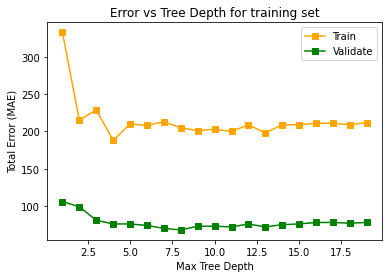

In [ ]:
import matplotlib.pyplot as plt
err=[]
errIndex=[]
errTest=[]
for treedepth in range(1,20):
    #clf2 = RandomForestClassifier(random_state=7, max_depth=16, min_samples_split=2,n_estimators=5,max_leaf_nodes=456,max_features=treedepth)
    clf2 = RandomForestClassifier(random_state=12, max_depth=13, min_samples_split=2,n_estimators=treedepth)
    model2 = clf2.fit(x_train, y_train)
    err.append(getTotalabsolutetrror(x_train, y_train, model2) )
    errTest. append(getTotalabsolutetrror(x_test, y_test, model2))
    errIndex.append(treedepth)
fig, ax = plt.subplots()
ax.plot(errIndex, err, 'rs-' , color="orange" ,linewidth=1.5) #,drawstyle-"steps-post")
ax.plot(errIndex, errTest, 'rs-' , color="green" ,linewidth=1.5 ) #,drawstyLe="steps-post")
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Total Error (MAE)")
ax.set_title("Error vs Tree Depth for training set")
plt.legend(["Train", "Validate"])


In [ ]:
from pickle import dump
with open('random_forest_model.pkl', 'wb') as files:
    dump(rf_clf, files)

In [ ]:
from joblib import dump

dump(rf_clf, 'filename.joblib')

['filename.joblib']

# Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier as DT

help(DT)
dt_clf = DT(random_state=15,max_depth=20,max_leaf_nodes=65,criterion='gini')
dt_clf.fit(x_train, y_train)


Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=65, random_state=15)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(confusion_matrix(y_test, dt_clf.predict(x_test)))
accuracy_score(y_test, dt_clf.predict(x_test))

[[634  10]
 [ 17 139]]


0.96625

In [27]:
# Evaluation on Training Data
print(confusion_matrix(y_train, dt_clf.predict(x_train)))
accuracy_score(y_train, dt_clf.predict(x_train))

[[2587    0]
 [  40  573]]


0.9875

In [38]:
x_train.to_excel('x_train.xlsx')

In [33]:
result_array = []
for i in range(2000):
    to_predict = np.array(x_train.iloc[i][:]).reshape(1,13)
    result_array.append(dt_clf.predict(to_predict))

c:\Users\vahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\vahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\vahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\vahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\vahab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feat

In [38]:
def getTotalabsolutetrror(X_t, y_t, modelInput):
    predictedValues = modelInput.predict(X_t)
    errors = y_t-predictedValues
    return(sum(abs(errors)))

C:\Users\vahab\AppData\Local\Temp\ipykernel_9668\2504085923.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, err, 'rs-' , color="orange" ,linewidth=1.5) #,drawstyle-"steps-post")
C:\Users\vahab\AppData\Local\Temp\ipykernel_9668\2504085923.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, errTest, 'rs-' , color="green" ,linewidth=1.5 ) #,drawstyLe="steps-post")


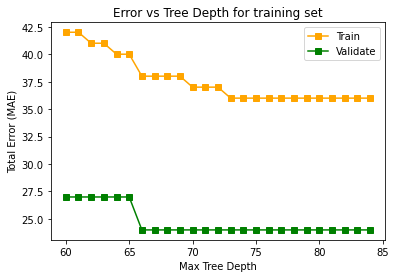

In [111]:
import matplotlib.pyplot as plt
err=[]
errIndex=[]
errTest=[]
for treedepth in range(60,85):
    clf2 = DT(random_state=15,max_depth=20,max_leaf_nodes=treedepth)
    model2 = clf2.fit(x_train, y_train)
    err.append(getTotalabsolutetrror(x_train, y_train, model2) )
    errTest. append(getTotalabsolutetrror(x_test, y_test, model2))
    errIndex.append(treedepth)
fig, ax = plt.subplots()
ax.plot(errIndex, err, 'rs-' , color="orange" ,linewidth=1.5) #,drawstyle-"steps-post")
ax.plot(errIndex, errTest, 'rs-' , color="green" ,linewidth=1.5 ) #,drawstyLe="steps-post")
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Total Error (MAE)")
ax.set_title("Error vs Tree Depth for training set")
plt.legend(["Train", "Validate"])


In [121]:
from pickle import dump
with open('DT_model.pkl', 'wb') as files:
    dump(dt_clf, files)